# Multiple Linear Regression

## Importing the libraries

In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score


## Importing the dataset

In [86]:
def Data_example():
    data = pd.read_csv('Fish.csv')
    df = data.copy()
    df.head()
    # Dependant (Target) Variable:
    
    y = df['Weight']
    # Independant Variables:
    X = df.drop(['Weight', 'Species'], axis=1)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    return X_train, y_train, X_test, y_test


## Multiple Linear Regression

In [87]:
class Multiple_Linear_Regression():
    def __init__(self):
        self.theta = np.zeros(int(np.random.random()), float)[:, np.newaxis]

    def fit(self, X_train, y_train):
        '''
        Fit data to the model based on the matrix approach to Linear Regression. Actual magic happens here!  

        PARAMETERS:
        X_train (numpy.ndarray): Independent variables train data.
        y_train (numpy.ndarray): Dependent variable of train data.

        RETURNS:
        Nothing
        '''
        X_b = np.c_[np.ones(len(X_train)), X_train]
        # Linear algebra  pseudo-inverse
        theta_bst = np.linalg.pinv(X_b.T.dot(X_b)).dot(X_b.T).dot(y_train)
        self.theta = theta_bst
        return theta_bst

    def predict(self, X_test):
        '''
        Fucntion to predict on new data.

        PARAMETERS:
        X_test (numpy.ndarray): Independent variables data.

        RETURNS:
        y_predict (numpy.ndarray): Predicted dependent variable.
        '''
        X_test = np.c_[np.ones((len(X_test), 1)), X_test]
        y_predict = np.dot(X_test, self.theta)

        return y_predict

## Training the Multiple Linear Regression model on the Training set

In [88]:
X_train, y_train, X_test, y_test = Data_example()
# MLR with Gradient Descent
model = Multiple_Linear_Regression()
theta = model.fit(X_train, y_train)

print('Equation for Multiple Linear Regression is')
str = ''
for i in range(len(theta)):
    str += f'{theta[i]}* b{i} +'

print('y = ',str[:-1])


Equation for Multiple Linear Regression is
y =  -501.7369469278185* b0 +45.0524728491579* b1 +6.450197101169278* b2 +-26.879728301966065* b3 +26.167874562573214* b4 +32.16469718254635* b5 


In [89]:
y_preds = model.predict(X_test)

predicted_results = pd.DataFrame({'Actual': y_test, 'Predicted': y_preds})

## Predicting the Test set results

Text(0.5, 1.0, 'True Value vs. Fitted Values')

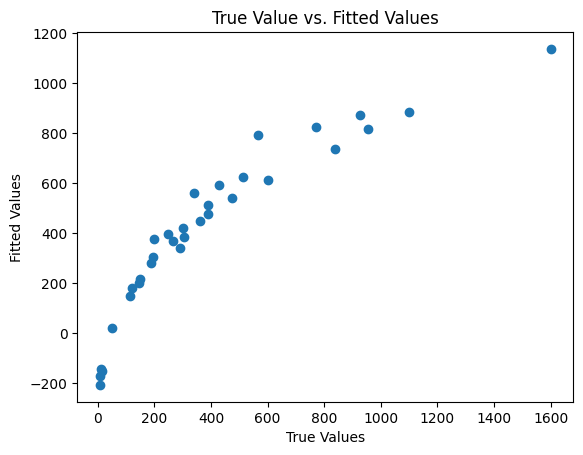

In [90]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_preds)
ax.set_xlabel('True Values')
ax.set_ylabel('Fitted Values')
ax.set_title('True Value vs. Fitted Values')

In [91]:
accuracy = r2_score(y_test, y_preds)
print(accuracy)

0.8269076412485927
